In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import pandas as pd
import numpy as np
import datetime as dt
import os
import warnings
warnings.filterwarnings('ignore')

In [135]:
train_df = pd.read_csv("./dont_use/train.csv")
valid_df = pd.read_csv('./dont_use/validate.csv')
train_df['날짜']=train_df['날짜'].astype('string')
valid_df['날짜']=valid_df['날짜'].astype('string')
#train_df['날짜'] = pd.to_datetime(train_df['날짜'],format='%Y%m%d')
#valid_df['날짜'] = pd.to_datetime(valid_df['날짜'],format='%Y%m%d')
holiday_df = pd.read_csv('./2020_holiday.csv')
highway =  train_df.columns[2:] # 각 도로 list

In [136]:
holiday_df.drop(1,inplace=True)

In [137]:
def make_day(a,b,c):
    b = '0'+str(b) if b <10 else str(b)
    c = '0'+str(c) if c <10 else str(c)
    return str(a)+b+c

In [138]:
holiday = []
for i in range(len(holiday_df)):
    holiday.append(make_day(holiday_df.iloc[i]['년'],holiday_df.iloc[i]['월'],holiday_df.iloc[i]['일']))

# Train 데이터 EDA

## 데이터 기초통계량

In [139]:
train_df.describe()

,시간,10,100,101,120,121,140,150,160,200,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
count,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,...,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000
mean,11.471485,231676.505337,66678.847514,7143.639829,17331.323879,6628.811833,4680.581580,99293.113144,4392.170784,11390.076243,...,5146.086612,10912.152181,27170.792925,13920.547728,4869.270204,14628.283623,2461.659652,12099.310765,7945.500762,13955.133882
std,6.925364,121980.705751,41643.311713,5571.818718,13324.699817,4783.716536,3532.599568,58442.772440,2855.469702,8728.090340,...,3874.383388,6166.799088,15608.559732,7125.224311,4082.563691,9570.485274,1876.079260,7996.564920,5208.472823,9277.435792
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,111763.500000,23461.500000,1898.500000,5187.500000,1697.500000,1311.000000,42964.000000,1524.500000,3190.500000,...,1304.500000,4479.000000,11522.500000,7208.500000,1492.000000,4975.500000,713.500000,3607.500000,2534.000000,3952.000000
50%,11.000000,266717.000000,73756.000000,6924.000000,16623.000000,7004.000000,4675.000000,111362.000000,4741.000000,10767.000000,...,5134.000000,12865.000000,31100.000000,15916.000000,4228.000000,15863.000000,2199.000000,13438.000000,8545.000000,15139.000000
75%,17.000000,327157.000000,99830.500000,10882.500000,25910.500000,10314.000000,6924.500000,140880.000000,6661.000000,16508.500000,...,8128.000000,16198.000000,39064.500000,19433.000000,6756.000000,21724.000000,3749.500000,18715.500000,12490.500000,22057.500000
max,23.000000,580098.000000,200808.000000,45869.000000,114833.000000,24596.000000,24639.000000,292004.000000,14163.000000,48349.000000,...,21409.000000,25891.000000,76629.000000,35192.000000,28531.000000,45531.000000,10581.000000,38061.000000,21229.000000,36915.000000


In [140]:
trafic_day = train_df.groupby('날짜').mean()
trafic_day.head()

,시간,10,100,101,120,121,140,150,160,200,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
날짜,,,,,,,,,,,,,,,,,,,,,
20200101,11.5,208612.750000,66992.208333,9003.625000,20051.458333,7614.875000,4804.166667,96516.625000,5421.416667,21530.041667,...,4522.291667,9758.916667,23045.125000,11277.458333,5806.250000,13923.416667,2789.583333,11159.416667,6772.750000,15274.750000
20200102,11.5,224595.583333,68284.750000,6905.166667,16791.833333,6336.791667,4336.208333,92816.458333,4717.500000,10994.583333,...,5163.125000,10989.625000,28980.250000,14503.916667,4329.208333,14138.083333,2908.000000,12992.208333,7190.708333,14444.666667
20200103,11.5,253329.125000,74075.083333,7919.458333,19711.583333,6917.375000,5097.875000,104135.000000,5057.083333,12251.166667,...,6024.166667,11371.083333,28217.458333,15474.583333,5035.791667,16338.666667,3000.875000,14560.708333,7923.958333,15739.750000
20200104,11.5,238578.541667,72664.125000,8077.875000,21275.250000,7471.416667,4936.375000,108240.666667,5167.208333,15808.125000,...,5786.666667,11094.708333,23722.208333,13781.458333,4885.000000,16180.375000,3123.083333,13348.750000,7448.916667,15517.541667
20200105,11.5,215839.583333,64413.708333,7203.166667,20155.125000,6257.750000,4458.958333,98142.916667,4719.875000,15282.083333,...,4760.250000,9986.583333,21132.250000,11344.291667,5261.000000,14038.958333,2586.166667,11251.625000,6192.041667,13021.333333


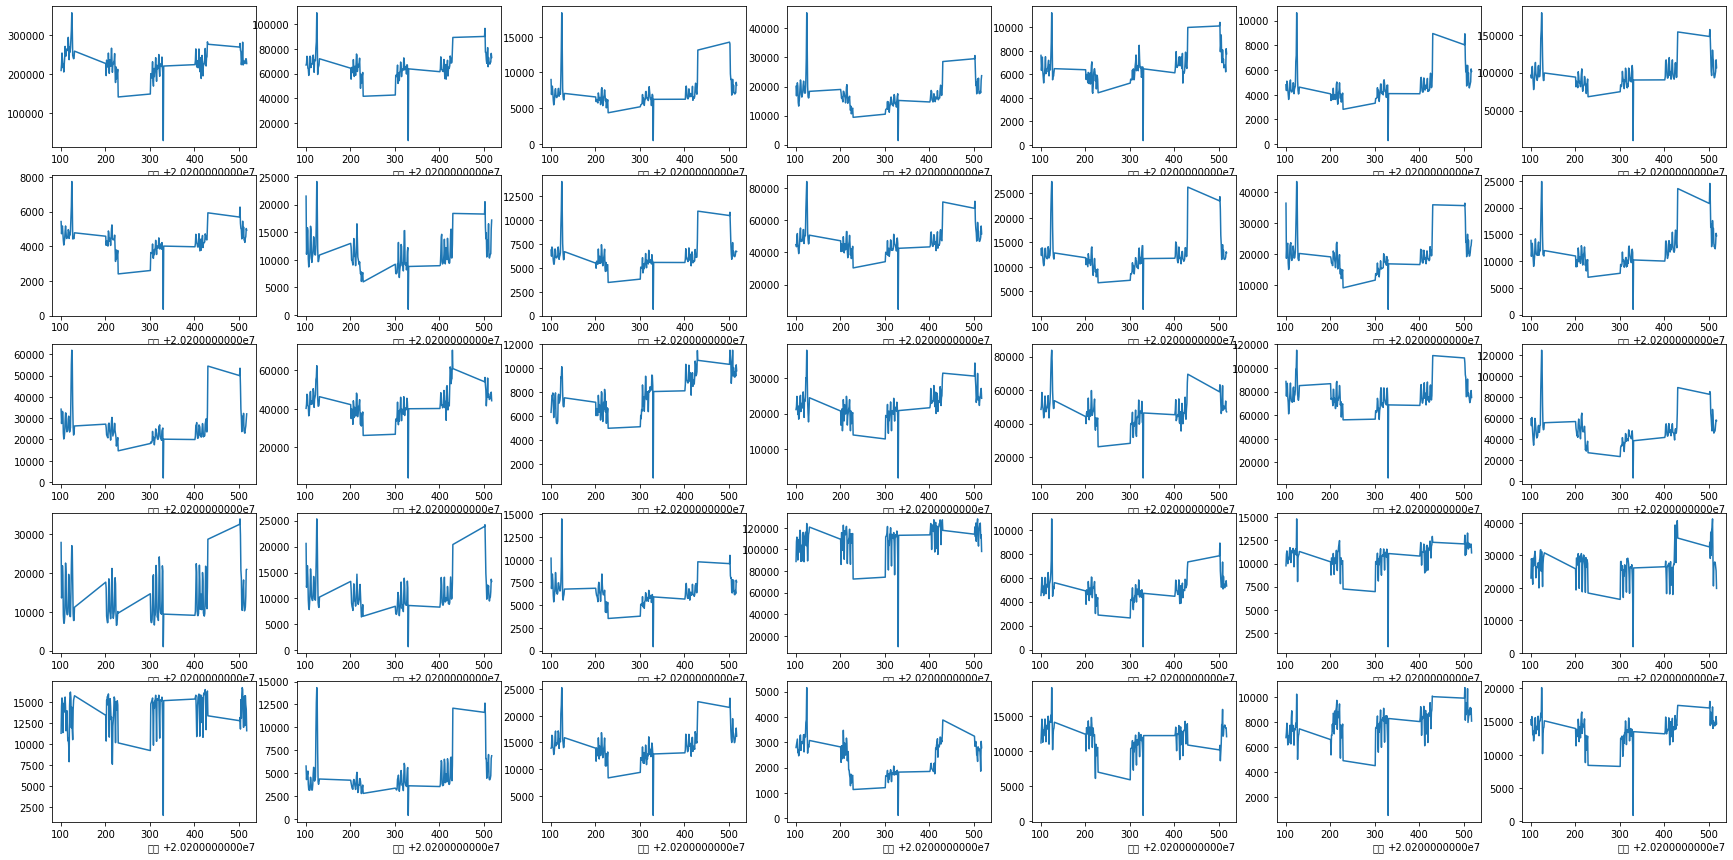

In [91]:
fig = plt.figure(figsize=(30,15))
for i in range(1,36):
    a = fig.add_subplot(5,7,i)
    a = trafic_day[highway[i-1]].plot()
plt.savefig('traific_by_day.png')
plt.show()


In [92]:
trafic_time = train_df.groupby('시간').mean()
trafic_time.head()

,날짜,10,100,101,120,121,140,150,160,200,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
시간,,,,,,,,,,,,,,,,,,,,,
0,2.020030e+07,80173.623188,14637.514493,1191.695652,3398.949275,1061.710145,940.739130,29371.782609,986.413043,2293.826087,...,788.920290,2785.108696,7360.036232,5138.797101,1285.442029,3703.579710,487.340580,2171.231884,1538.115942,2276.376812
1,2.020030e+07,56958.166667,9971.543478,832.840580,2504.376812,693.934783,696.550725,20529.905797,675.985507,1752.195652,...,506.862319,1902.710145,4772.702899,3432.659420,1048.797101,2752.789855,344.318841,1497.782609,1077.130435,1644.992754
2,2.020030e+07,45276.000000,8235.379562,720.394161,2136.605839,496.036496,581.802920,15929.248175,515.102190,1504.729927,...,375.919708,1490.175182,3715.751825,2521.416058,879.635036,2331.861314,284.773723,1235.905109,902.058394,1384.875912
3,2.020030e+07,44243.642336,9517.306569,754.343066,2271.481752,479.773723,590.372263,15785.058394,523.437956,1558.722628,...,364.437956,1545.620438,3823.116788,2271.072993,871.014599,2392.343066,279.058394,1407.700730,912.343066,1631.167883
4,2.020030e+07,60451.605839,15585.000000,1103.401460,3506.350365,702.452555,778.000000,23621.233577,811.919708,1994.700730,...,547.583942,2368.321168,6315.277372,3254.635036,1102.890511,3204.204380,433.562044,2276.386861,1450.313869,2682.540146


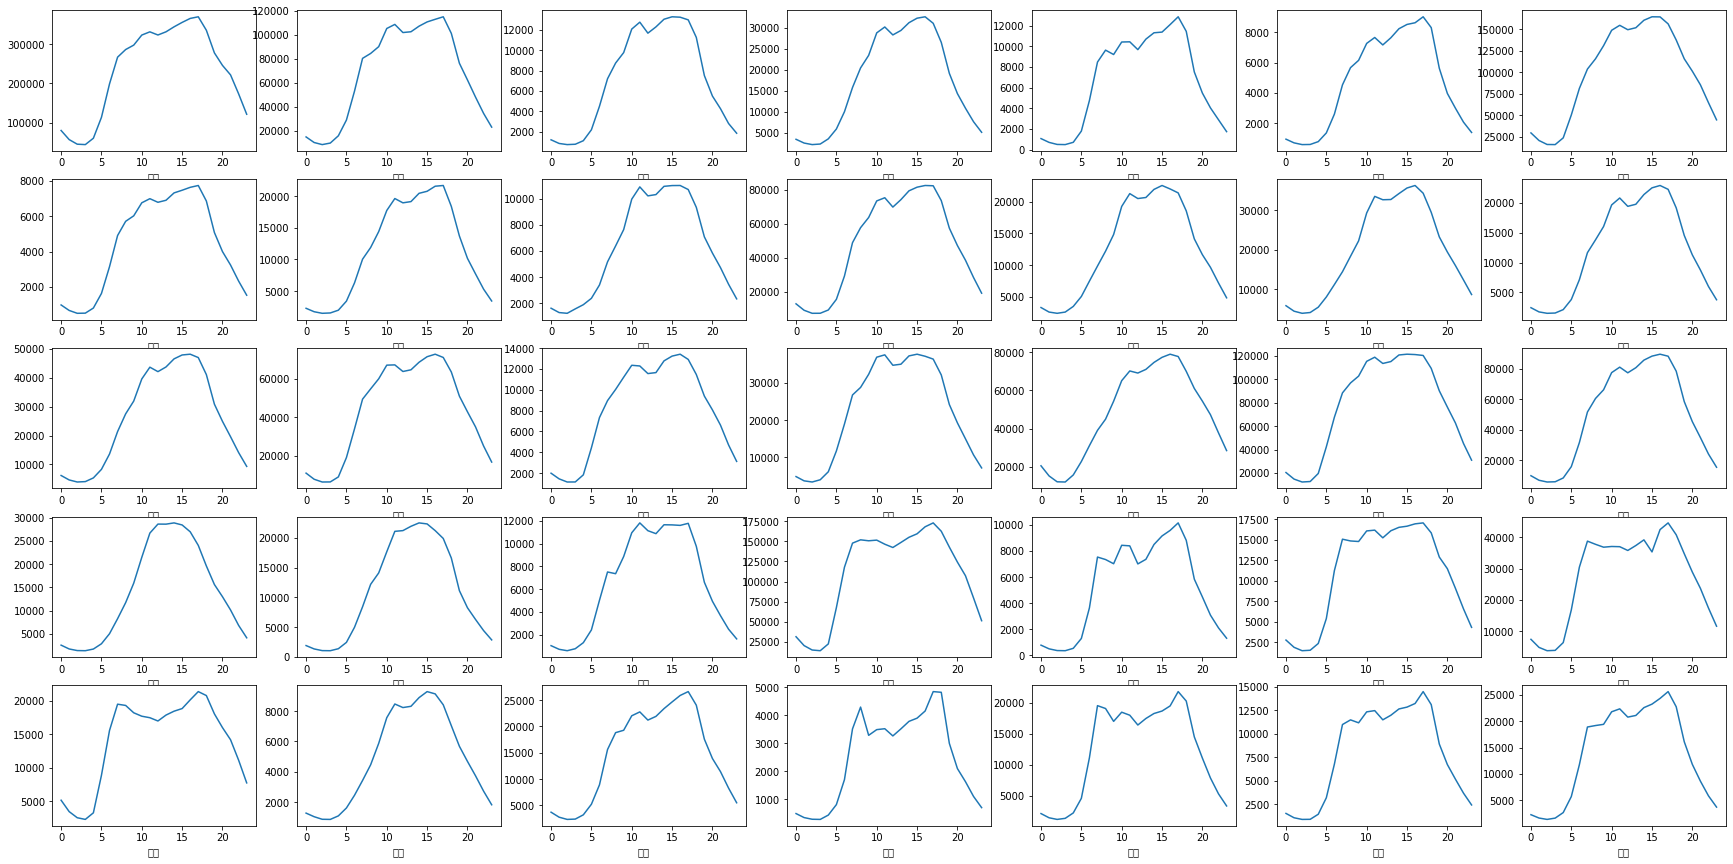

In [93]:
fig = plt.figure(figsize=(30,15))
for i in range(1,36):
    a = fig.add_subplot(5,7,i)
    a = trafic_time[highway[i-1]].plot()
plt.savefig('trafic_by_time.png')
plt.show()


## 이상치 탐색

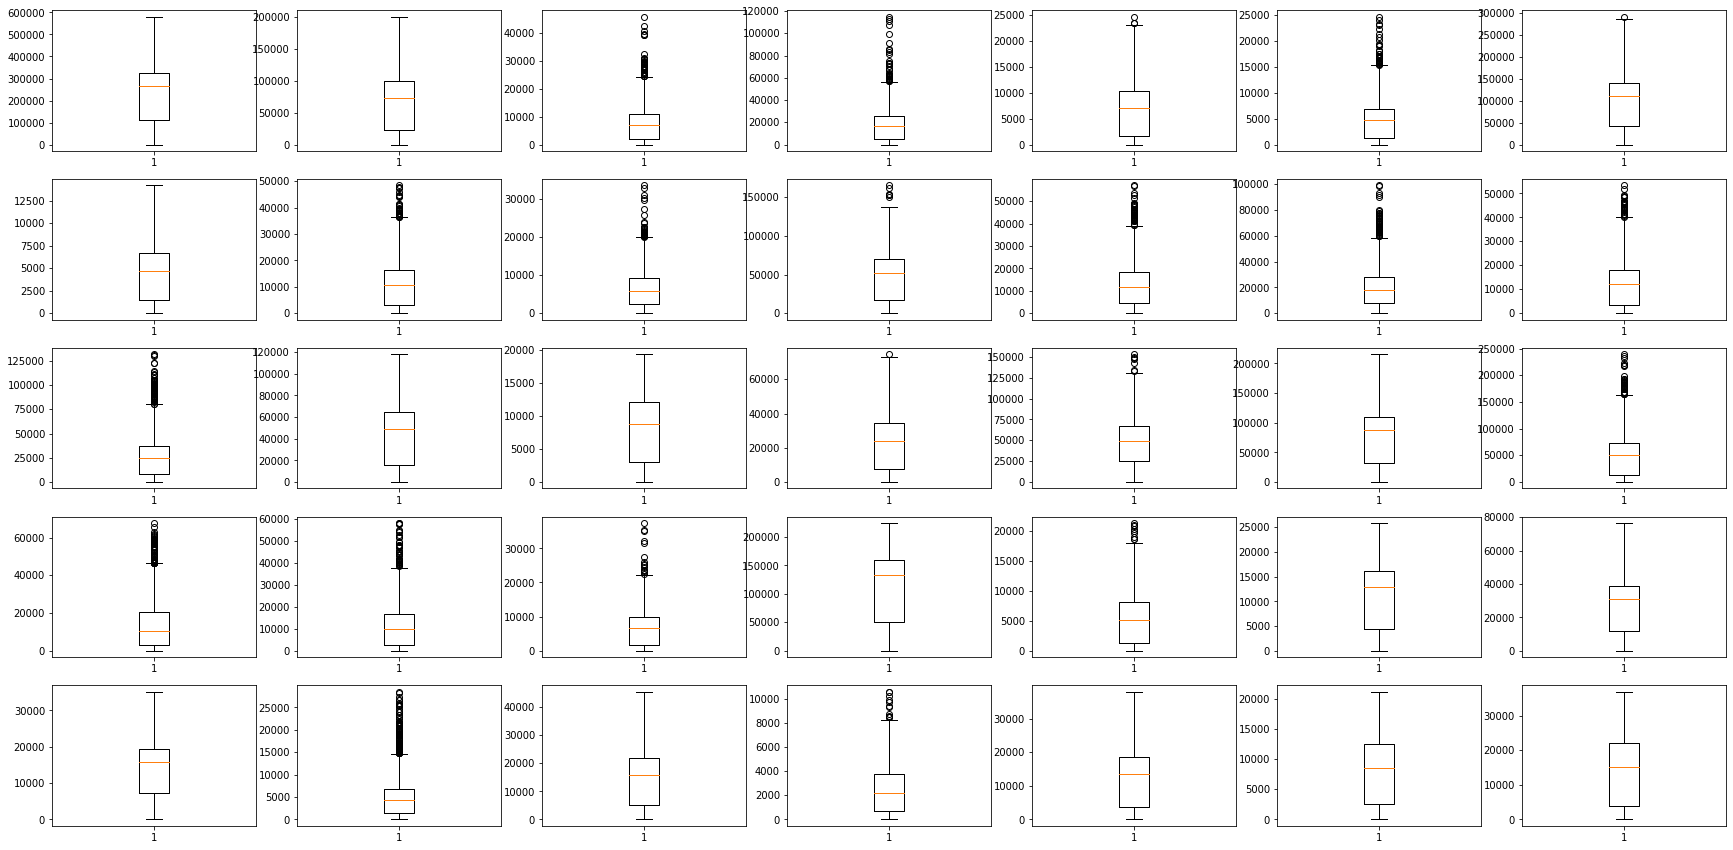

In [94]:
fig = plt.figure(figsize=(30,15))
for i in range(35):
    a = fig.add_subplot(5,7,i+1)
    a = plt.boxplot(train_df[highway[i]])
plt.show()

#### 설날 이상치 대체

In [141]:
for i in['24','25','26']:
    train_df.loc[train_df['날짜']=='202001'+i,'10':] = np.mean(np.concatenate([
        train_df.loc[train_df['날짜']=='202002'+i,'10':].to_numpy().reshape((24,35,1)),
        train_df.loc[train_df['날짜']=='202003'+i,'10':].to_numpy().reshape((24,35,1)),
        train_df.loc[train_df['날짜']=='202004'+i,'10':].to_numpy().reshape((24,35,1))
    ],axis=2),axis=2)

#### 결측 1. 특정 날짜 시간이 값이 0인 값을 앞뒤 2주의 동시간 평균으로 대체

In [ ]:
for i in highway:
    print(train_df[train_df[i]==0].loc[:,['날짜','시간',i]],'\n','===============================')
    
    
    
# 2020년 2월 6일 18시와 5월 15일 5시는 이상치 2주를 기준으로 앞뒤의 결과값 평균으로 대체

In [142]:
train_df.loc[(train_df['날짜']=='20200206')&(train_df['시간']==18),'10':] = np.mean([train_df.loc[train_df['날짜']=='20200123','10':].iloc[18],
         train_df.loc[train_df['날짜']=='20200130','10':].iloc[18],
         train_df.loc[train_df['날짜']=='20200113','10':].iloc[18],
         train_df.loc[train_df['날짜']=='20200120','10':].iloc[18]],axis=0)

In [143]:
train_df.loc[(train_df['날짜']=='20200515')&(train_df['시간']==5),'10':]= np.mean([train_df.loc[train_df['날짜']=='20200501','10':].iloc[5],
         train_df.loc[train_df['날짜']=='20200508','10':].iloc[5],
         valid_df.loc[valid_df['날짜']=='20200522','10':].iloc[5]],axis=0)

#### 결측 2. 전체 시간이 측정되지 않은 결측치를 대체

In [144]:
trafic_day[trafic_day['시간']!=11.5]

# 2월 29일과 3월 30일에 모든 시간이 측정되지 않음

,시간,10,100,101,120,121,140,150,160,200,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
날짜,,,,,,,,,,,,,,,,,,,,,
20200229,6.0,140871.384615,41629.923077,4349.153846,9393.076923,4435.923077,2817.692308,68187.153846,2400.307692,5987.692308,...,2885.307692,7248.923077,18425.307692,10134.769231,2828.307692,8352.615385,1132.846154,6968.384615,4932.769231,8419.923077
20200330,0.5,29310.500000,5665.000000,449.000000,1377.500000,370.500000,287.000000,10285.500000,358.500000,1016.500000,...,239.500000,1001.500000,1897.000000,1525.500000,434.500000,1321.000000,111.000000,776.000000,559.500000,907.500000


In [145]:
train_df.loc[train_df['날짜']=="20200229"]  #13시부터 측정값이 없다.

,날짜,시간,10,100,101,120,121,140,150,160,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
1416,20200229,0,70783.0,12481.0,1074.0,2920.0,1020.0,956.0,26231.0,677.0,...,613.0,2540.0,7873.0,5389.0,1026.0,3447.0,401.0,1706.0,1381.0,1872.0
1417,20200229,1,51754.0,8195.0,694.0,2141.0,617.0,703.0,19200.0,593.0,...,440.0,1545.0,5193.0,3925.0,866.0,2685.0,231.0,1240.0,1014.0,1428.0
1418,20200229,2,41031.0,7143.0,641.0,1936.0,597.0,595.0,14281.0,416.0,...,372.0,1499.0,4047.0,2893.0,800.0,2313.0,237.0,1107.0,848.0,1307.0
1419,20200229,3,37688.0,7626.0,624.0,1742.0,420.0,500.0,13834.0,442.0,...,343.0,1424.0,3915.0,2283.0,636.0,2083.0,201.0,1257.0,807.0,1181.0
1420,20200229,4,46899.0,11199.0,781.0,2720.0,651.0,653.0,18429.0,609.0,...,442.0,2146.0,5882.0,2999.0,705.0,2737.0,391.0,1888.0,1163.0,1797.0
1421,20200229,5,80770.0,20795.0,1717.0,4251.0,1385.0,1018.0,38419.0,1110.0,...,944.0,4123.0,13280.0,7195.0,912.0,3920.0,542.0,3485.0,2561.0,4000.0
1422,20200229,6,126497.0,35718.0,3163.0,6909.0,3872.0,1840.0,57764.0,1882.0,...,2492.0,7496.0,19922.0,10239.0,1737.0,5548.0,895.0,7021.0,4730.0,8105.0
1423,20200229,7,156874.0,51431.0,4414.0,10409.0,5324.0,3191.0,72190.0,2940.0,...,4516.0,10094.0,22121.0,11850.0,2424.0,7812.0,1407.0,10988.0,6980.0,11540.0
1424,20200229,8,189865.0,57387.0,5271.0,12740.0,5784.0,3666.0,100060.0,3474.0,...,4062.0,10906.0,26327.0,15156.0,3405.0,10854.0,1697.0,11589.0,7241.0,12127.0
1425,20200229,9,229212.0,70651.0,7700.0,15575.0,7699.0,4894.0,110886.0,4191.0,...,4950.0,12192.0,30064.0,16810.0,4651.0,13805.0,1932.0,11631.0,8396.0,14127.0


In [146]:
imputation_0229 =np.mean(np.concatenate([train_df.loc[(train_df['날짜']=="20200215")&((train_df['시간']>=13)&(train_df['시간']<=23)),'10':].to_numpy().reshape((11,35,1)),
                train_df.loc[(train_df['날짜']=="20200223")&((train_df['시간']>=13)&(train_df['시간']<=23)),'10':].to_numpy().reshape((11,35,1)),
                train_df.loc[(train_df['날짜']=="20200307")&((train_df['시간']>=13)&(train_df['시간']<=23)),'10':].to_numpy().reshape((11,35,1)),
                train_df.loc[(train_df['날짜']=="20200314")&((train_df['시간']>=13)&(train_df['시간']<=23)),'10':].to_numpy().reshape((11,35,1))],axis =2),axis=2)

In [147]:
imputation_0229_df = pd.concat([pd.DataFrame({'날짜':"20200229",'시간':np.arange(13,24)}),pd.DataFrame(imputation_0229,columns=highway)],axis=1)

In [148]:
train_df.loc[train_df['날짜']=="20200330"] # 02시 부터 값이 없다.

,날짜,시간,10,100,101,120,121,140,150,160,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
2125,20200330,0,38243.0,7403.0,585.0,1695.0,426.0,351.0,13476.0,430.0,...,330.0,1257.0,2574.0,2011.0,521.0,1662.0,139.0,950.0,761.0,1130.0
2126,20200330,1,20378.0,3927.0,313.0,1060.0,315.0,223.0,7095.0,287.0,...,149.0,746.0,1220.0,1040.0,348.0,980.0,83.0,602.0,358.0,685.0


In [149]:
imputation_0330 =np.mean(np.concatenate([train_df.loc[(train_df['날짜']=="20200316")&((train_df['시간']>=2)&(train_df['시간']<=23)),'10':].to_numpy().reshape((22,35,1)),
                train_df.loc[(train_df['날짜']=="20200323")&((train_df['시간']>=2)&(train_df['시간']<=23)),'10':].to_numpy().reshape((22,35,1)),
                train_df.loc[(train_df['날짜']=="20200406")&((train_df['시간']>=2)&(train_df['시간']<=23)),'10':].to_numpy().reshape((22,35,1)),
                train_df.loc[(train_df['날짜']=="20200413")&((train_df['시간']>=2)&(train_df['시간']<=23)),'10':].to_numpy().reshape((22,35,1))],axis =2),axis=2)

In [150]:
imputation_0330_df = pd.concat([pd.DataFrame({'날짜':"20200330",'시간':np.arange(2,24)}),pd.DataFrame(imputation_0330,columns=highway)],axis=1)

In [151]:
new_train = pd.concat([train_df,imputation_0229_df,imputation_0330_df],axis=0,ignore_index=True)

In [152]:
new_train = new_train.sort_values(by=['날짜','시간'],ascending=True,ignore_index=True)

In [153]:
new_train['holiday'] = new_train['날짜'].apply(lambda x: 1 if x in holiday else 0)

In [154]:
new_train['날짜'] = pd.to_datetime(new_train['날짜'],format='%Y%m%d')

In [155]:
new_trafic_day = new_train.groupby('날짜').mean()

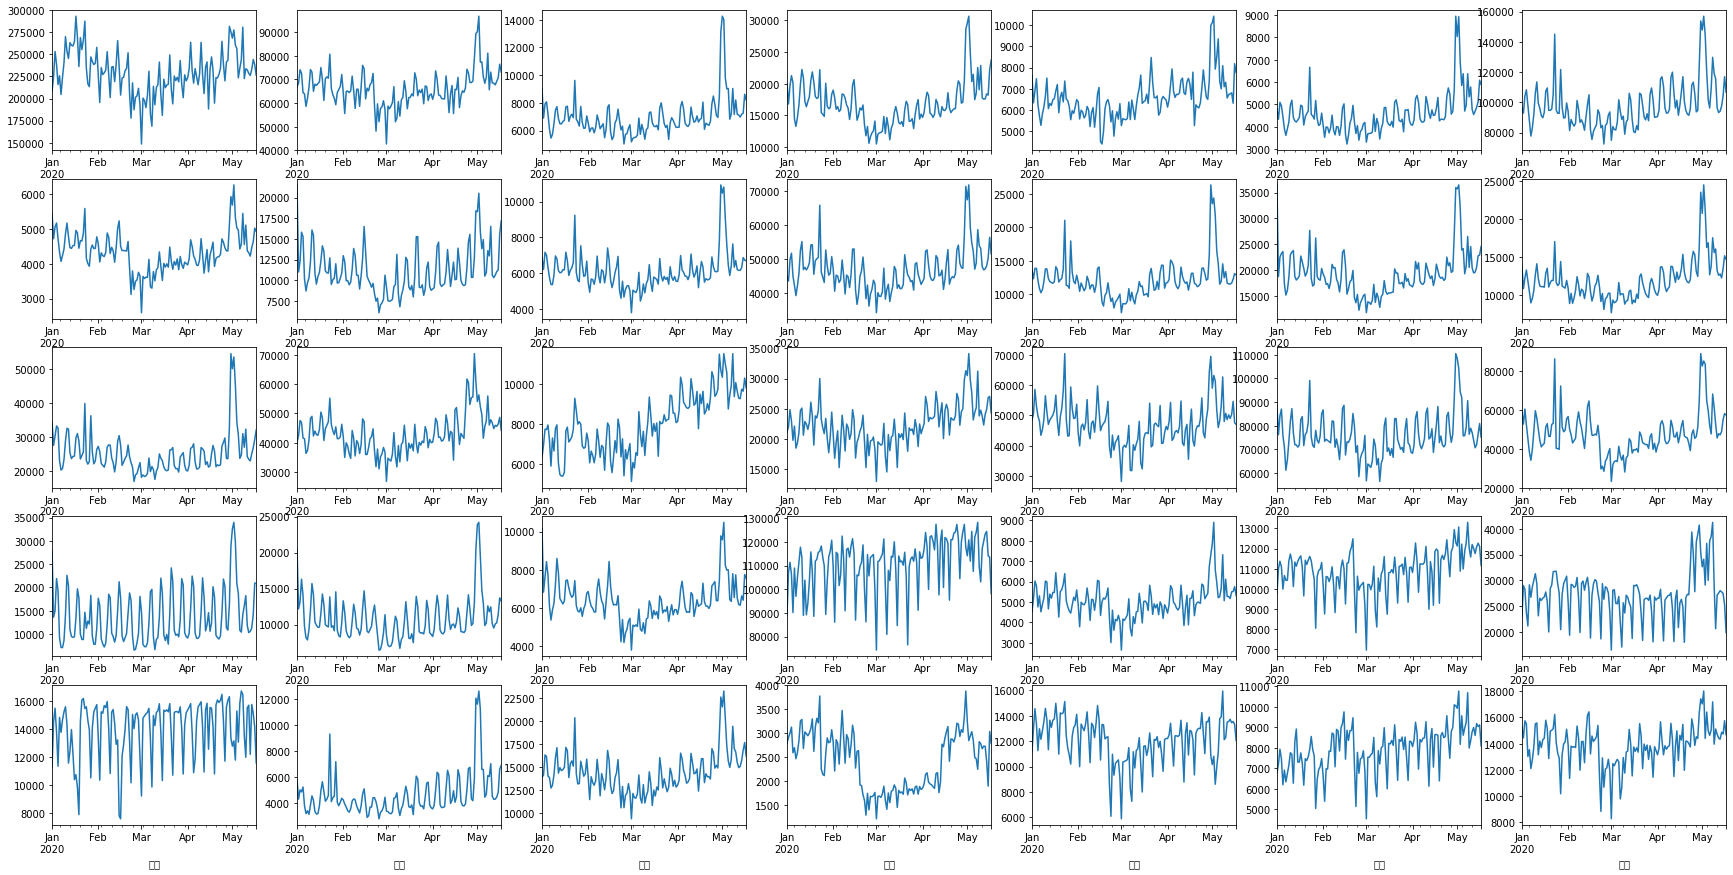

In [156]:
fig = plt.figure(figsize=(30,15))
for i in range(1,36):
    a = fig.add_subplot(5,7,i)
    a = new_trafic_day[highway[i-1]].plot()
plt.savefig('traific_by_day.png')
plt.show()


In [157]:
new_train.to_csv('EDA_train.csv',index=False)

# Valid 데이터 EDA

In [219]:
train_df['날짜'] = train_df['날짜'].astype('string')
valid_df['날짜'] = valid_df['날짜'].astype('string')
valid_df.describe()

,시간,10,100,101,120,121,140,150,160,200,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
count,336.00000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,...,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,11.50000,235343.178571,71733.666667,7487.821429,19463.369048,6996.550595,5077.711310,102803.354167,4611.598214,12565.401786,...,5495.931548,12047.080357,25495.544643,14492.982143,5274.627976,16028.535714,2401.651786,13426.627976,8977.973214,14981.702381
std,6.93251,117811.294711,43156.834589,5324.147176,13039.262009,4900.174019,3595.835251,56432.536386,2866.635243,8830.367927,...,3952.463967,6583.668086,13846.890911,7081.452424,3706.415352,9929.888516,1671.879588,8268.859967,5603.276265,9589.916393
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.75000,124277.500000,26059.500000,2058.000000,6277.750000,1806.750000,1426.500000,49778.250000,1854.250000,4227.750000,...,1485.750000,5046.500000,11302.000000,8489.500000,1860.750000,5879.250000,795.000000,4374.000000,3198.000000,4672.500000
50%,11.50000,291569.500000,84219.500000,7585.500000,20308.000000,7565.000000,5329.000000,119572.000000,5062.000000,12700.000000,...,5640.000000,14996.500000,29671.000000,17037.500000,4891.000000,17802.500000,2363.500000,15901.500000,9662.500000,16447.000000
75%,17.25000,326878.250000,104994.750000,11626.250000,28508.250000,10776.750000,7523.750000,144746.250000,6806.250000,17532.000000,...,8689.750000,17698.500000,37066.500000,19961.750000,7417.000000,23388.750000,3497.500000,20104.250000,13849.250000,23266.250000
max,23.00000,439173.000000,150733.000000,19038.000000,53098.000000,17634.000000,14861.000000,226740.000000,10638.000000,35738.000000,...,15828.000000,21257.000000,48132.000000,26537.000000,15578.000000,36225.000000,6220.000000,29441.000000,19906.000000,31504.000000


#### 결측 1. 특정 시간의 측정값이 0인 부분

In [220]:
for i in highway:
    print(valid_df[valid_df[i]==0].loc[:,['날짜','시간',i]],'\n','===============================')
    
    
    
# 2020년 5월 15일 5시와 5월 21일 11,12,13시는 이상치 2주를 기준으로 앞뒤의 결과값 평균으로 대체 1,8 22, 29 ||||| 7 14 28 4

           날짜  시간  10
101  20200515   5   0 
           날짜  시간  100
101  20200515   5    0 
           날짜  시간  101
101  20200515   5    0
251  20200521  11    0
252  20200521  12    0
253  20200521  13    0 
           날짜  시간  120
101  20200515   5    0 
           날짜  시간  121
101  20200515   5    0
251  20200521  11    0
252  20200521  12    0
253  20200521  13    0 
           날짜  시간  140
101  20200515   5    0
251  20200521  11    0
252  20200521  12    0
253  20200521  13    0 
           날짜  시간  150
101  20200515   5    0 
           날짜  시간  160
101  20200515   5    0 
           날짜  시간  200
101  20200515   5    0 
           날짜  시간  201
101  20200515   5    0 
           날짜  시간  251
101  20200515   5    0 
           날짜  시간  270
101  20200515   5    0 
           날짜  시간  300
101  20200515   5    0 
           날짜  시간  301
101  20200515   5    0 
           날짜  시간  351
101  20200515   5    0 
           날짜  시간  352
101  20200515   5    0 
           날짜  시간  370
101  20200515   5   

* 15일 결측치 처리

In [221]:
valid_df.loc[(valid_df['날짜']=='20200515')&(valid_df['시간']==5),'10':] = np.mean([train_df.loc[train_df['날짜']=='20200501','10':].iloc[5],
                                                                                train_df.loc[train_df['날짜']=='20200508','10':].iloc[5],
                                                                                valid_df.loc[valid_df['날짜']=='20200522','10':].iloc[5]],
                                                                               axis=0)

* 21일 11,12,13시 특정 도로 결측 처리

In [222]:
for i in [11,12,13]:
    valid_df.loc[(valid_df['날짜']=='20200521')&(valid_df['시간']==i),['101','121','140']] = np.mean([valid_df.loc[valid_df['날짜']=='20200514',['101','121','140']].iloc[i],
             train_df.loc[train_df['날짜']=='20200507',['101','121','140']].iloc[i]],axis=0)

In [223]:
val_trafic_day = valid_df.groupby('날짜').mean()

In [224]:
val_trafic_day # 측정이 안된 시간 없음.

,시간,10,100,101,120,121,140,150,160,200,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
날짜,,,,,,,,,,,,,,,,,,,,,
20200511,11.5,232457.125000,68484.166667,7179.291667,17793.875000,6562.666667,4778.750000,96267.916667,4370.583333,10617.958333,...,5268.208333,12200.125000,27126.875000,15507.916667,4551.500000,15522.958333,2671.166667,13494.375000,8779.541667,14725.250000
20200512,11.5,228437.958333,68389.166667,7124.958333,17556.208333,6724.875000,4548.625000,93190.250000,4313.250000,10304.083333,...,5270.375000,12004.458333,27523.708333,15687.916667,4317.708333,14953.000000,2724.083333,13549.875000,8989.166667,14428.041667
20200513,11.5,226142.541667,67678.791667,6976.958333,17618.791667,6768.208333,4700.458333,94054.000000,4218.125000,10608.458333,...,5165.375000,11752.125000,27983.166667,12190.916667,4324.583333,15101.333333,2722.625000,13725.958333,8602.125000,14338.458333
20200514,11.5,233126.375000,69241.875000,7179.125000,18388.083333,6805.458333,4874.291667,97534.625000,4463.041667,11037.708333,...,5495.583333,12080.750000,27757.833333,15741.416667,4484.875000,15757.208333,2401.625000,13451.333333,9177.250000,14864.958333
20200515,11.5,244232.291667,70704.361111,7259.180556,18204.222222,6317.611111,5123.097222,104179.458333,4631.944444,11253.541667,...,5515.263889,12265.347222,27441.611111,15102.541667,4850.027778,16874.375000,1889.527778,13548.944444,9034.430556,14733.166667
20200516,11.5,238294.583333,76430.375000,8621.958333,22193.541667,8181.041667,6086.583333,116896.333333,5020.125000,15564.666667,...,5749.666667,12104.500000,25294.333333,14142.000000,6641.750000,17694.208333,3032.958333,13324.083333,9113.333333,15751.791667
20200517,11.5,226397.041667,73129.000000,8203.625000,23734.125000,7755.041667,5886.416667,106641.083333,4924.500000,17190.250000,...,5308.208333,11158.625000,19844.791667,11580.333333,6924.041667,16190.666667,2783.875000,12054.583333,8091.791667,14678.416667
20200518,11.5,225621.958333,67342.666667,6668.416667,17520.708333,6485.125000,4510.916667,89293.458333,4258.041667,10849.208333,...,4808.041667,11887.458333,26089.458333,14907.875000,4106.291667,14988.291667,2694.625000,13680.333333,8654.000000,14104.125000
20200519,11.5,221742.458333,66524.625000,6533.041667,16288.041667,6113.625000,4187.208333,85617.500000,4241.750000,9855.625000,...,5097.416667,11922.875000,26204.375000,15124.416667,3755.083333,13985.375000,2507.875000,13091.000000,8813.416667,14258.458333


In [225]:
val_holiday = {'holiday':[]}
for i in range(len(valid_df)):
    if valid_df.iloc[i,0] in holiday.to_list():
        val_holiday['holiday'].append(1)
    else:
        val_holiday['holiday'].append(0)

In [228]:
valid_df = pd.concat([valid_df,pd.DataFrame(val_holiday)],axis=1)

In [229]:
valid_df.to_csv('EDA_valid.csv',index=False)

,날짜,시간,10,100,101,120,121,140,150,160,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,2020-05-11,0,77968,14429,1233,4021,981,881,28672,1064,...,637,2604,5239,4168,1155,3596,337,2262,1608,2337
1,2020-05-11,1,48679,9136,823,2618,654,572,17722,672,...,353,1870,3359,2558,1002,2157,257,1425,1018,1810
2,2020-05-11,2,33773,8199,578,2188,392,502,14464,579,...,345,1499,2646,2022,876,1959,232,1155,927,1530
3,2020-05-11,3,41511,9986,726,2817,555,646,17793,650,...,390,1730,3398,1967,912,2462,281,1477,959,1882
4,2020-05-11,4,78680,19509,1463,4720,825,1088,35125,997,...,679,2958,7369,4120,1569,4568,577,3155,1871,3656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,2020-05-24,19,314226,98345,10625,28618,8316,6684,141675,6619,...,8254,16118,23304,14082,8447,21694,2180,15746,10903,21014
332,2020-05-24,20,300001,87871,8226,22706,6981,5743,142933,6295,...,5225,15297,21919,14526,7332,19732,1990,14096,10028,17787
333,2020-05-24,21,304150,71126,6002,18317,4939,3779,133110,4781,...,4072,12685,21135,14403,5443,16967,1359,11670,7963,14041
334,2020-05-24,22,236751,44947,3575,11455,3135,2536,98582,3267,...,2489,8093,14427,10914,3861,11397,859,7270,5194,8230


# Test 데이터 전처리

In [159]:
test_df  = pd.read_csv('./dont_use/test.csv')
test_df['날짜'] = test_df['날짜'].astype('string')

In [161]:
test_df['holiday'] = test_df['날짜'].apply(lambda x: 1 if x in holiday else 0)

In [162]:
for i in highway:
    print(test_df[test_df[i]==0].loc[:,['날짜','시간',i]],'\n','===============================')
    
    
    
# 2020년 5월 21일 11,12,13시는 이상치 2주를 기준으로 앞뒤의 결과값 평균으로 대체 7 14 28 4

Empty DataFrame
Columns: [날짜, 시간, 10]
Index: [] 
Empty DataFrame
Columns: [날짜, 시간, 100]
Index: [] 
          날짜  시간  101
83  20200521  11    0
84  20200521  12    0
85  20200521  13    0 
Empty DataFrame
Columns: [날짜, 시간, 120]
Index: [] 
          날짜  시간  121
83  20200521  11    0
84  20200521  12    0
85  20200521  13    0 
          날짜  시간  140
83  20200521  11    0
84  20200521  12    0
85  20200521  13    0 
Empty DataFrame
Columns: [날짜, 시간, 150]
Index: [] 
Empty DataFrame
Columns: [날짜, 시간, 160]
Index: [] 
Empty DataFrame
Columns: [날짜, 시간, 200]
Index: [] 
Empty DataFrame
Columns: [날짜, 시간, 201]
Index: [] 
Empty DataFrame
Columns: [날짜, 시간, 251]
Index: [] 
Empty DataFrame
Columns: [날짜, 시간, 270]
Index: [] 
Empty DataFrame
Columns: [날짜, 시간, 300]
Index: [] 
Empty DataFrame
Columns: [날짜, 시간, 301]
Index: [] 
Empty DataFrame
Columns: [날짜, 시간, 351]
Index: [] 
Empty DataFrame
Columns: [날짜, 시간, 352]
Index: [] 
Empty DataFrame
Columns: [날짜, 시간, 370]
Index: [] 
Empty DataFrame
Columns: [날짜, 시간, 

In [163]:
for i in [11,12,13]:
    test_df.loc[(test_df['날짜']=='20200521')&(test_df['시간']==i),['101','121','140']] = np.mean([valid_df.loc[valid_df['날짜']=='20200514',['101','121','140']].iloc[i],
             train_df.loc[train_df['날짜']=='20200507',['101','121','140']].iloc[i]],axis=0)

In [164]:
test_df

,날짜,시간,10,100,101,120,121,140,150,160,...,1040,1100,1200,1510,2510,3000,4510,5510,6000,holiday
0,20200518,0,82065,15172,1500.0,3294,1086.0,962.0,28931,1103,...,2790,5147,4331,1329,3665,404,2242,1619,2314,0
1,20200518,1,51248,9840,813.0,2356,696.0,546.0,17888,720,...,1864,3269,2561,921,2081,272,1390,1003,1766,0
2,20200518,2,39026,7894,760.0,2413,408.0,549.0,13357,498,...,1313,2765,1931,920,1764,228,1136,922,1309,0
3,20200518,3,40993,10137,780.0,2701,420.0,741.0,15544,532,...,1766,3320,2060,892,2447,337,1495,975,1912,0
4,20200518,4,77863,19603,1276.0,5019,968.0,1160.0,32101,968,...,2914,6986,3911,1368,4380,513,2940,1758,3629,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,20200531,19,-999,-999,-999.0,-999,-999.0,-999.0,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,0
332,20200531,20,-999,-999,-999.0,-999,-999.0,-999.0,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,0
333,20200531,21,-999,-999,-999.0,-999,-999.0,-999.0,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,0
334,20200531,22,-999,-999,-999.0,-999,-999.0,-999.0,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,0


In [165]:
test_df.to_csv('EDA_test.csv',index=False)